In [235]:
import pandas as pd
import numpy as np
copy_movies_page_info = pd.read_csv('movie_data.csv')

In [236]:
copy_movies_page_info

,title,MPAA_rate,domestic_gross_pay,worldwide_gross_pay,budget,lifetime_ranking,running_time,distributor,genre,top_director,top_actor,first_genre,second_genre,third_genre,fourth_genre
0,See Spot Run,PG,33357476,43057552.0,35000000.0,NaN,94.0,Warner Bros.,Action Comedy Crime ...,George Gallo,David Arquette,Action,Comedy,Crime,Family
1,Teen Wolf,PG,33086611,NaN,NaN,NaN,91.0,Atlantic Releasing Corporation,Comedy Fantasy Romance,Jeph Loeb,Michael J.,Comedy,Fantasy,Romance,NaN
2,The Second Best Exotic Marigold Hotel,PG,33078266,85978292.0,10000000.0,NaN,122.0,Fox Searchlight Pictures,Comedy Drama Romance,Ol Parker,Judi Dench,Comedy,Drama,Romance,NaN
3,Tron,PG,33000000,33000525.0,17000000.0,NaN,96.0,Walt Disney Studios Motion Pictures,Action Adventure Sci-Fi,Steven Lisberger,Jeff Bridges,Action,Adventure,Sci-Fi,NaN
4,The Sandlot,PG,32950136,34348443.0,NaN,NaN,101.0,Twentieth Century Fox,Comedy Drama Family ...,David Mickey,Tom Guiry,Comedy,Drama,Family,Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Song of the Sea,PG,857522,4190884.0,NaN,NaN,93.0,GKIDS,Adventure Animation ...,Will Collins,David Rawle,Adventure,Animation,Drama,Family Fantasy
992,Sharkwater,PG,850920,1658393.0,NaN,NaN,89.0,Freestyle Releasing,Documentary,Rob Stewart,Rob Stewart,Documentary,NaN,NaN,NaN
993,Scoob!,PG,850000,25750000.0,NaN,NaN,93.0,Warner Bros.,Adventure Animation ...,Adam Sztykiel,Will Forte,Adventure,Animation,Comedy,Crime Family Fantasy...
994,Guadalupe: El Milagro Y El Mensaje,PG,848139,1499149.0,NaN,NaN,90.0,Slowhand Cinema Releasing,Drama Family Fantasy...,Tessie Gutierrez,José Carlos,Drama,Family,Fantasy,Mystery


In [237]:
copy_movies_page_info = copy_movies_page_info[~copy_movies_page_info.index.duplicated(keep='first')]
copy_movies_page_info['worldwide_gross_pay'] = copy_movies_page_info['worldwide_gross_pay'].fillna(copy_movies_page_info['domestic_gross_pay'])
copy_movies_page_info.info()
copy_movies_page_info.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                996 non-null    object 
 1   MPAA_rate            996 non-null    object 
 2   domestic_gross_pay   996 non-null    int64  
 3   worldwide_gross_pay  996 non-null    float64
 4   budget               173 non-null    float64
 5   lifetime_ranking     0 non-null      float64
 6   running_time         980 non-null    float64
 7   distributor          995 non-null    object 
 8   genre                996 non-null    object 
 9   top_director         996 non-null    object 
 10  top_actor            993 non-null    object 
 11  first_genre          996 non-null    object 
 12  second_genre         877 non-null    object 
 13  third_genre          600 non-null    object 
 14  fourth_genre         283 non-null    object 
dtypes: float64(4), int64(1), object(10)
memo

Index(['title', 'MPAA_rate', 'domestic_gross_pay', 'worldwide_gross_pay',
       'budget', 'lifetime_ranking', 'running_time', 'distributor', 'genre',
       'top_director', 'top_actor', 'first_genre', 'second_genre',
       'third_genre', 'fourth_genre'],
      dtype='object')

In [238]:
#make other cells to make data more readable
dist_counts = copy_movies_page_info.distributor.value_counts()
other_dist = list(dist_counts[dist_counts <=13].index)
copy_movies_page_info['distributor'] = copy_movies_page_info['distributor'].replace(other_dist,'Other_Dist').replace(np.nan,'Other_Dist')
copy_movies_page_info.distributor.value_counts()

Other_Dist                             283
Warner Bros.                           109
Universal Pictures                      98
Walt Disney Studios Motion Pictures     83
Twentieth Century Fox                   77
Paramount Pictures                      71
Metro-Goldwyn-Mayer (MGM)               68
Columbia Pictures                       45
TriStar Pictures                        29
Orion Pictures                          22
Sony Pictures Classics                  22
Miramax                                 21
Lionsgate                               19
New Line Cinema                         18
Sony Pictures Entertainment (SPE)       16
United Artists                          15
Name: distributor, dtype: int64

In [239]:
#make other cells to make data more readable
actor_counts = copy_movies_page_info.top_actor.value_counts()
other_actor = list(actor_counts[actor_counts <=2].index)
copy_movies_page_info['top_actor'] = copy_movies_page_info['top_actor'].replace(other_actor,'Other_Actor').replace('Genre keyword','Other_Actor').replace(np.nan,'Other_Actor')
copy_movies_page_info.top_actor.value_counts()

Other_Actor           817
Woody Allen             9
Dudley Moore            7
Chevy Chase             6
Peter Sellers           6
John Cusack             5
Clint Eastwood          5
Jeff Bridges            5
Michael Caine           5
Brendan Fraser          5
Gene Hackman            5
Robert De               5
Sylvester Stallone      5
Sean Connery            4
Anthony Hopkins         4
Mel Gibson              4
Goldie Hawn             4
Burt Reynolds           4
Dan Aykroyd             4
Richard Dreyfuss        4
Tom Berenger            4
Walter Matthau          4
Christina Ricci         3
Chuck Norris            3
Tom Hanks               3
Hilary Duff             3
Eddie Murphy            3
Christopher Reeve       3
Kristy McNichol         3
Rick Moranis            3
Harrison Ford           3
Gene Wilder             3
Peter Ustinov           3
Martin Short            3
Jack Lemmon             3
Sally Field             3
John Goodman            3
Michael J.              3
Jonathan Tay

In [240]:
first_genre_counts = copy_movies_page_info.first_genre.value_counts()
other_first_genre = list(first_genre_counts[first_genre_counts <=5].index)
copy_movies_page_info['first_genre'] = copy_movies_page_info['first_genre'].replace(other_first_genre,'Other_First_Genre')
copy_movies_page_info.first_genre.value_counts()

Comedy               352
Drama                179
Adventure            175
Action               133
Biography             69
Documentary           44
Other_First_Genre     16
Crime                 13
Animation              8
Horror                 7
Name: first_genre, dtype: int64

In [241]:
second_genre_counts = copy_movies_page_info.second_genre.value_counts()
other_second_genre = list(second_genre_counts[second_genre_counts <=10].index)
copy_movies_page_info['second_genre'] = copy_movies_page_info['second_genre'].replace(other_second_genre,'Other_Second_Genre')
copy_movies_page_info.second_genre.value_counts()

Drama                 241
Family                106
Comedy                 95
Adventure              85
Romance                66
Crime                  52
Animation              44
Music                  40
Fantasy                34
Other_Second_Genre     32
Mystery                20
Sport                  19
Sci-Fi                 19
Documentary            13
History                11
Name: second_genre, dtype: int64

In [242]:
third_genre_counts = copy_movies_page_info.third_genre.value_counts()
other_third_genre = list(third_genre_counts[third_genre_counts <=8].index)
copy_movies_page_info['third_genre'] = copy_movies_page_info['third_genre'].replace(other_third_genre,'Other_Third_Genre')
copy_movies_page_info.third_genre.value_counts()
copy_movies_page_info

,title,MPAA_rate,domestic_gross_pay,worldwide_gross_pay,budget,lifetime_ranking,running_time,distributor,genre,top_director,top_actor,first_genre,second_genre,third_genre,fourth_genre
0,See Spot Run,PG,33357476,43057552.0,35000000.0,NaN,94.0,Warner Bros.,Action Comedy Crime ...,George Gallo,Other_Actor,Action,Comedy,Crime,Family
1,Teen Wolf,PG,33086611,33086611.0,NaN,NaN,91.0,Other_Dist,Comedy Fantasy Romance,Jeph Loeb,Michael J.,Comedy,Fantasy,Romance,NaN
2,The Second Best Exotic Marigold Hotel,PG,33078266,85978292.0,10000000.0,NaN,122.0,Other_Dist,Comedy Drama Romance,Ol Parker,Other_Actor,Comedy,Drama,Romance,NaN
3,Tron,PG,33000000,33000525.0,17000000.0,NaN,96.0,Walt Disney Studios Motion Pictures,Action Adventure Sci-Fi,Steven Lisberger,Jeff Bridges,Action,Adventure,Sci-Fi,NaN
4,The Sandlot,PG,32950136,34348443.0,NaN,NaN,101.0,Twentieth Century Fox,Comedy Drama Family ...,David Mickey,Other_Actor,Comedy,Drama,Family,Sport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Song of the Sea,PG,857522,4190884.0,NaN,NaN,93.0,Other_Dist,Adventure Animation ...,Will Collins,Other_Actor,Adventure,Animation,Drama,Family Fantasy
992,Sharkwater,PG,850920,1658393.0,NaN,NaN,89.0,Other_Dist,Documentary,Rob Stewart,Other_Actor,Documentary,NaN,NaN,NaN
993,Scoob!,PG,850000,25750000.0,NaN,NaN,93.0,Warner Bros.,Adventure Animation ...,Adam Sztykiel,Other_Actor,Adventure,Animation,Comedy,Crime Family Fantasy...
994,Guadalupe: El Milagro Y El Mensaje,PG,848139,1499149.0,NaN,NaN,90.0,Other_Dist,Drama Family Fantasy...,Tessie Gutierrez,Other_Actor,Drama,Family,Fantasy,Mystery


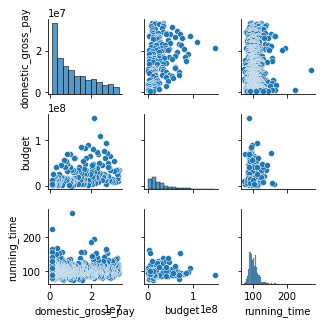

In [243]:
import seaborn as sns
sns.pairplot(copy_movies_page_info[['domestic_gross_pay','budget','running_time']], height = 1.5)

In [244]:
#do log transformation
copy_movies_page_info['log_dom_gross'] = copy_movies_page_info['domestic_gross_pay'].apply(lambda x: np.log(x))
copy_movies_page_info['log_budget'] = copy_movies_page_info['budget'].apply(lambda x: np.log(x))

In [246]:
copy_movies_dummies_info = pd.get_dummies(copy_movies_page_info, columns = ['distributor','first_genre'], drop_first = True)
copy_movies_dummies_info.columns

Index(['title', 'MPAA_rate', 'domestic_gross_pay', 'worldwide_gross_pay',
       'budget', 'lifetime_ranking', 'running_time', 'genre', 'top_director',
       'top_actor', 'second_genre', 'third_genre', 'fourth_genre',
       'log_dom_gross', 'log_budget', 'distributor_Lionsgate',
       'distributor_Metro-Goldwyn-Mayer (MGM)', 'distributor_Miramax',
       'distributor_New Line Cinema', 'distributor_Orion Pictures',
       'distributor_Other_Dist', 'distributor_Paramount Pictures',
       'distributor_Sony Pictures Classics',
       'distributor_Sony Pictures Entertainment (SPE)',
       'distributor_TriStar Pictures', 'distributor_Twentieth Century Fox',
       'distributor_United Artists', 'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'first_genre_Adventure',
       'first_genre_Animation', 'first_genre_Biography', 'first_genre_Comedy',
       'first_genre_Crime', 'first_genre_Documentary', 'first_genre

In [247]:
from sklearn.model_selection import train_test_split
X, X_test,y, y_test = train_test_split(copy_movies_dummies_info[[
       'budget', 'running_time', 'log_budget',
        'distributor_Metro-Goldwyn-Mayer (MGM)',
       'distributor_Other_Dist', 'distributor_Paramount Pictures',
       'distributor_Sony Pictures Classics', 'distributor_TriStar Pictures',
       'distributor_Twentieth Century Fox', 'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.']],copy_movies_dummies_info['log_dom_gross'], test_size=0.2,random_state=40)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 550 to 326
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   budget                                           133 non-null    float64
 1   running_time                                     784 non-null    float64
 2   log_budget                                       133 non-null    float64
 3   distributor_Metro-Goldwyn-Mayer (MGM)            796 non-null    uint8  
 4   distributor_Other_Dist                           796 non-null    uint8  
 5   distributor_Paramount Pictures                   796 non-null    uint8  
 6   distributor_Sony Pictures Classics               796 non-null    uint8  
 7   distributor_TriStar Pictures                     796 non-null    uint8  
 8   distributor_Twentieth Century Fox                796 non-null    uint8  
 9   distributor_Universal Pictures

In [248]:
X['running_time'] = X['running_time'].fillna(X['running_time'].median())
X['budget'] = X['budget'].fillna(X['budget'].median())
X['log_budget'] = X['log_budget'].fillna(X['log_budget'].median())
X_test['running_time'] = X_test['running_time'].fillna(X['running_time'].median())
X_test['budget'] = X_test['budget'].fillna(X['budget'].median())
X_test['log_budget'] = X_test['log_budget'].fillna(X_test['log_budget'].median())
X['budget2'] = X['budget']**2
X_test['budget2'] = X_test['budget']**2
X.columns

Index(['budget', 'running_time', 'log_budget',
       'distributor_Metro-Goldwyn-Mayer (MGM)', 'distributor_Other_Dist',
       'distributor_Paramount Pictures', 'distributor_Sony Pictures Classics',
       'distributor_TriStar Pictures', 'distributor_Twentieth Century Fox',
       'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.', 'budget2'],
      dtype='object')

In [249]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LassoCV, RidgeCV, ElasticNetCV

lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression()

In [250]:
lr_model.score(X,y)

0.18854521819410652

In [251]:
lr_model.score(X_test,y_test)

0.24541391231030407

In [252]:
movies_dummies_corr = copy_movies_dummies_info.corr()[['log_dom_gross','budget','running_time', 'log_budget',
       'distributor_Metro-Goldwyn-Mayer (MGM)', 'distributor_Other_Dist',
       'distributor_Paramount Pictures', 'distributor_Sony Pictures Classics',
       'distributor_TriStar Pictures', 'distributor_Twentieth Century Fox',
       'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures',
       'distributor_Warner Bros.']]
movies_dummies_corr

,log_dom_gross,budget,running_time,log_budget,distributor_Metro-Goldwyn-Mayer (MGM),distributor_Other_Dist,distributor_Paramount Pictures,distributor_Sony Pictures Classics,distributor_TriStar Pictures,distributor_Twentieth Century Fox,distributor_Universal Pictures,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.
domestic_gross_pay,0.913741,0.274395,0.046476,0.338545,0.003885,-0.344217,0.040770,-0.123243,0.095284,0.125575,0.069143,0.167054,0.111631
worldwide_gross_pay,0.405358,0.391301,0.013862,0.382243,-0.041322,-0.085134,-0.034089,-0.062656,0.019318,0.058931,0.079172,0.091576,0.000509
budget,0.319489,1.000000,-0.113665,0.800122,-0.050911,-0.137143,-0.077183,-0.030733,-0.026035,0.023972,0.115444,0.174334,0.061949
lifetime_ranking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
running_time,0.025514,-0.113665,1.000000,-0.089323,0.038630,-0.011950,-0.021845,0.000784,0.005963,-0.027905,-0.022005,-0.065834,-0.002227
log_dom_gross,1.000000,0.319489,0.025514,0.381864,0.026977,-0.413480,0.064475,-0.157962,0.104003,0.144970,0.074240,0.176889,0.117234
log_budget,0.381864,0.800122,-0.089323,1.000000,0.036119,-0.241199,-0.082746,0.000886,-0.000393,0.092952,0.115256,0.132721,0.064895
distributor_Lionsgate,0.045519,-0.101433,-0.048030,-0.066826,-0.037749,-0.087857,-0.038636,-0.020959,-0.024150,-0.040366,-0.046069,-0.042047,-0.048886
distributor_Metro-Goldwyn-Mayer (MGM),0.026977,-0.050911,0.038630,0.036119,1.000000,-0.170541,-0.074996,-0.040683,-0.046878,-0.078355,-0.089424,-0.081618,-0.094893
distributor_Miramax,0.007763,-0.010743,-0.004633,0.040779,-0.039727,-0.092460,-0.040660,-0.022057,-0.025415,-0.042481,-0.048482,-0.044250,-0.051447


In [254]:
movies_dummies_corr = copy_movies_dummies_info[['domestic_gross_pay','budget','running_time','distributor_Twentieth Century Fox','distributor_Walt Disney Studios Motion Pictures','distributor_Warner Bros.']].corr()[['domestic_gross_pay','budget','running_time','distributor_Twentieth Century Fox','distributor_Walt Disney Studios Motion Pictures','distributor_Warner Bros.']]
movies_dummies_corr

,domestic_gross_pay,budget,running_time,distributor_Twentieth Century Fox,distributor_Walt Disney Studios Motion Pictures,distributor_Warner Bros.
domestic_gross_pay,1.000000,0.274395,0.046476,0.125575,0.167054,0.111631
budget,0.274395,1.000000,-0.113665,0.023972,0.174334,0.061949
running_time,0.046476,-0.113665,1.000000,-0.027905,-0.065834,-0.002227
distributor_Twentieth Century Fox,0.125575,0.023972,-0.027905,1.000000,-0.087275,-0.101470
distributor_Walt Disney Studios Motion Pictures,0.167054,0.174334,-0.065834,-0.087275,1.000000,-0.105695
distributor_Warner Bros.,0.111631,0.061949,-0.002227,-0.101470,-0.105695,1.000000


<AxesSubplot:>

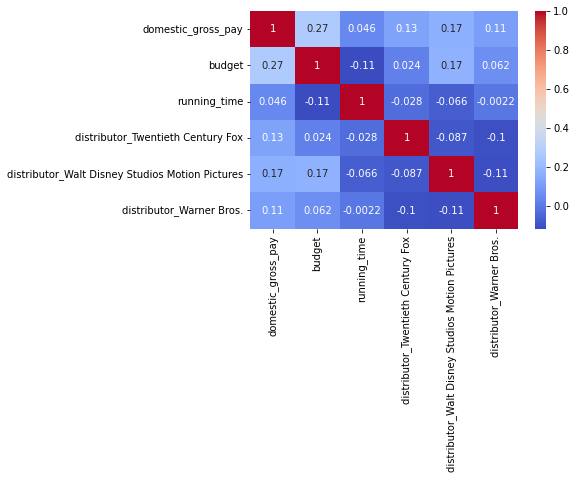

In [255]:
import seaborn as sns
sns.heatmap(movies_dummies_corr,cmap = 'coolwarm', annot=True)

In [256]:

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)


In [257]:
#Standardize data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)
X_std = std.transform(X.values)
X_std_test = std.transform(X_test.values)

In [259]:
#kfold = KFold(n_splits=5, shuffle=True, random_state=40)
#lin_reg_est = LinearRegression()
#scores_train = cross_val_score(lin_reg_est,X,y,cv=kfold)
#scores_test = cross_val_score(lin_reg_est,X_test,y_test,cv=kfold)
#scores_train
#np.mean(scores_train)

In [258]:
#Find LASSO model
import numpy as np
alphavec = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphavec, cv=kfold)
lasso_model.fit(X_std,y)
lasso_model.alpha_
lasso_model.score(X_std,y)

0.2418705514447449

In [260]:
lasso_model.alpha_

0.01

In [261]:
list(zip(X.columns,lasso_model.coef_))

[('budget', 0.16655586908824674),
 ('running_time', 0.018426685445371335),
 ('log_budget', -0.06316486816704958),
 ('distributor_Metro-Goldwyn-Mayer (MGM)', 0.0),
 ('distributor_Other_Dist', -0.35951538990553084),
 ('distributor_Paramount Pictures', 0.029581457350061735),
 ('distributor_Sony Pictures Classics', -0.18356038781517017),
 ('distributor_TriStar Pictures', 0.06973329382212311),
 ('distributor_Twentieth Century Fox', 0.07794298234495445),
 ('distributor_Universal Pictures', 0.03750604964888608),
 ('distributor_Walt Disney Studios Motion Pictures', 0.10483698936801274),
 ('distributor_Warner Bros.', 0.028665503729060033),
 ('budget2', -0.0)]

In [262]:
mask = lasso_model.coef_ > 0.03
coef_list = list(lasso_model.coef_[mask])
coef_list
X.columns[mask]

Index(['budget', 'distributor_TriStar Pictures',
       'distributor_Twentieth Century Fox', 'distributor_Universal Pictures',
       'distributor_Walt Disney Studios Motion Pictures'],
      dtype='object')

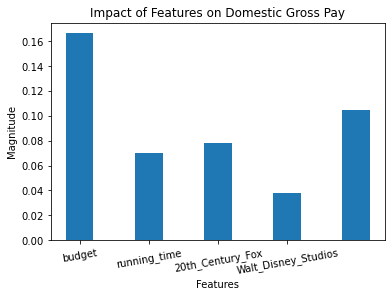

In [263]:
import matplotlib.pyplot as plt
plt.bar(X.columns[mask],coef_list,width=0.4)
#plt.xticks(rotation=35);
plt.xticks([0, 1, 2,3], ['budget', 'running_time', '20th_Century_Fox','Walt_Disney_Studios'], rotation=10)
plt.xlabel('Features')
plt.ylabel('Magnitude')
plt.title('Impact of Features on Domestic Gross Pay');

In [264]:
test_set_pred = lasso_model.predict(X_std_test)

In [265]:
lasso_model.score(X_std_test,y_test)

0.26100942958488416

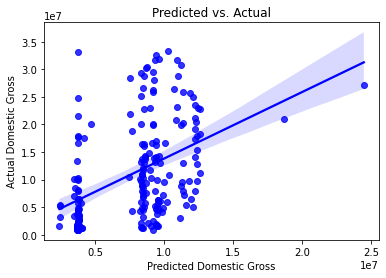

In [266]:
fig = sns.regplot(x=np.exp(test_set_pred),y=np.exp(y_test), color = 'blue')
fig.set(xlabel='Predicted Domestic Gross',ylabel = 'Actual Domestic Gross', \
       title = 'Predicted vs. Actual');

In [267]:
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(np.exp(test_set_pred),np.exp(y_test))

6376053.0026542805